In [1]:
# Регрессия
# Набор Факторов -> Конкретное значение

# 28 дней назад -> 7 дней вперед


In [2]:
# Классификация -> определяет принадлежность объекта к классу

In [1]:
import pandas as pd
import sklearn

In [2]:
money = pd.read_csv('usd_exchange_rate.csv')

In [3]:
values = money['curs']

In [4]:
past_days = 7*4
future_days = 7

In [6]:
start = past_days
end = len(values) - future_days
print(start,end)

28 939


In [7]:
raw_df =[]
for i in range(start, end):
    past_and_future_values = values[(i-past_days):(i+future_days)]
    raw_df.append(list(past_and_future_values))

In [9]:
past_columns = [f'past_{i}' for i in range(past_days)]
future_columns = [f'future_{i}' for i in range(future_days)]

In [10]:
df = pd.DataFrame(raw_df, columns=(past_columns + future_columns))

In [13]:
# Тренировочная выборка, "Учебник"
X_in = df[past_columns][:-1]  # Факторы, по которым делается предсказание
Y_out = df[future_columns][:-1] # ТО, что мы собираемся предсказывать
# Мульти-регрессия, мы предсказываем сразу 7 значений

In [38]:
# Тестовая выборка, "экзамен"
X_test = df[past_columns][-1:]
Y_test = df[future_columns][-1:]

In [39]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

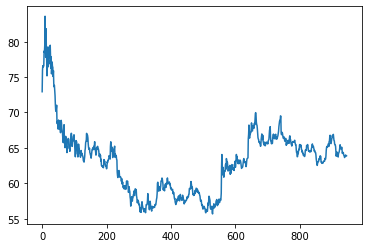

In [40]:
plt.plot(values)

In [85]:
LinReg = LinearRegression() # Натсройки алгоритма

In [86]:
LinReg.fit(X_in, Y_out) # Обучение

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
prediction = LinReg.predict(X_test) # Предсказание

In [88]:
prediction

array([[63.90229154, 63.87462141, 63.84695883, 63.93915612, 63.93692321,
        63.95379212, 63.8847385 ]])

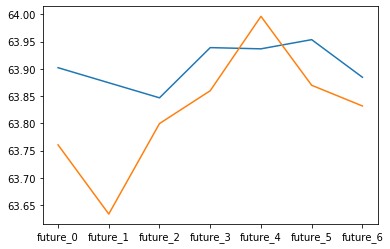

In [89]:
plt.plot(prediction[0], label = 'prediction')
plt.plot(Y_test.iloc[0], label= 'real')
plt.show()

In [90]:
# Оценка полученных параметров
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
#средняя абсолютная ошибка
mean_absolute_error(Y_test, prediction)

0.10076218757688744

In [92]:
#средняя квадратичная ошибка
mean_squared_error(Y_test, prediction)

0.014290098695526996

In [139]:
from sklearn.neural_network import MLPRegressor

In [140]:
MLP = MLPRegressor(max_iter=600, random_state=10)

In [141]:
MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=600, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [142]:
MLP.fit(X_in, Y_out)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=600, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

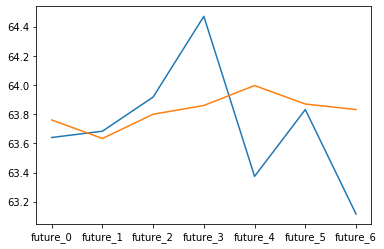

In [143]:
prediction = MLP.predict(X_test)
plt.plot(prediction[0], label = 'prediction')
plt.plot(Y_test.iloc[0], label= 'real')
plt.show()

In [144]:
#средняя абсолютная ошибка
print('средняя абсолютная ошибка', mean_absolute_error(Y_test, prediction))

средняя абсолютная ошибка 0.3251997250698021


In [145]:
#средняя квадратичная ошибка
print('средняя квадратичная ошибка', mean_squared_error(Y_test, prediction))

средняя квадратичная ошибка 0.18670009194907128


In [117]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
DTR = DecisionTreeRegressor()

In [129]:
DTR

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [130]:
DTR.fit(X_in, Y_out)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

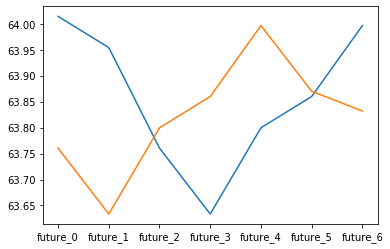

In [131]:
prediction = DTR.predict(X_test)
plt.plot(prediction[0], label = 'prediction')
plt.plot(Y_test.iloc[0], label= 'real')
plt.show()

In [132]:
#средняя абсолютная ошибка
print('средняя абсолютная ошибка', mean_absolute_error(Y_test, prediction))
#средняя квадратичная ошибка
print('средняя квадратичная ошибка', mean_squared_error(Y_test, prediction))

средняя абсолютная ошибка 0.17305714285714252
средняя квадратичная ошибка 0.04084961999999966
